In [14]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('emotion_dataset.csv')

In [3]:
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

   Unnamed: 3  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [5]:
df.shape

(34792, 2)

In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 3'], axis=1, inplace=True)

In [6]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [13]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [7]:
#Checking if there are any missing values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [8]:
#checking for duplication
df.duplicated().sum()

3631

In [9]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(31161, 2)

## Exploratory Data Analysis

#### Label column visualization

In [11]:
df['Emotion'].value_counts()

joy         10464
sadness      6175
fear         4266
surprise     4015
anger        3777
neutral      1466
disgust       854
shame         144
Name: Emotion, dtype: int64

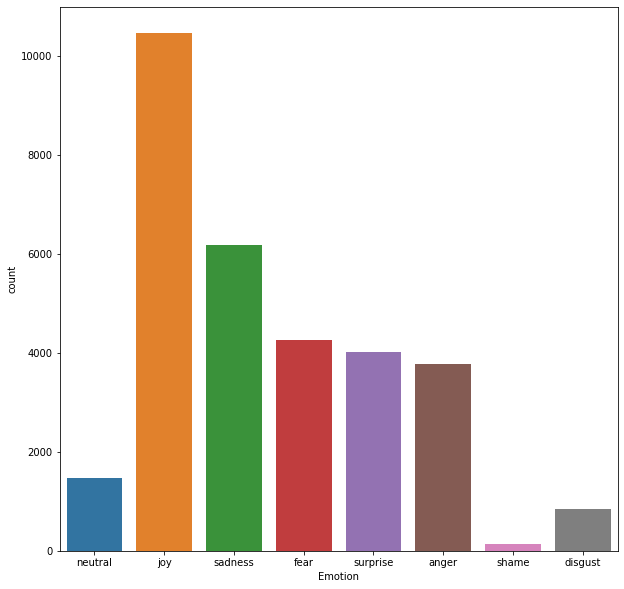

In [16]:
# Plot
plt.figure(figsize=(10,10))
sns.countplot(x='Emotion',data=df)
plt.show()

We can observe lot of imbalance in classes.
We will handle this in future

### We are going to perform sentiment analysis for our emotions and perform keyword extraction to take out most common keywords in each emotion and then build Wordcloud for them

#### Sentiment Analysis

In [18]:
from textblob import TextBlob

In [19]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = 'Negative'
    else:
        result = 'Neutral'
    return result

In [21]:
#just some testing before applying to data
get_sentiment("I want to travel the world")

'Neutral'

In [22]:
get_sentiment("It's to boring")

'Negative'

In [23]:
get_sentiment("I love to work with data")

'Positive'

In [24]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [25]:
df.head()

Emotion                                               Text Sentiment
0  neutral                                             Why ?    Neutral
1      joy    Sage Act upgrade on my to do list for tommorow.   Neutral
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative
3      joy   Such an eye ! The true hazel eye-and so brill...  Positive
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral

In [27]:
df['Sentiment'].value_counts()

Positive    12227
Neutral     10925
Negative     8009
Name: Sentiment, dtype: int64

Now lets compare and see our Emotions and Sentiments to see how much percentage of our Emotions are neutral or negative or positive

In [28]:
df.groupby(['Emotion', 'Sentiment']).size()

Emotion   Sentiment
anger     Negative     1565
          Neutral      1205
          Positive     1007
disgust   Negative      323
          Neutral       250
          Positive      281
fear      Negative     1282
          Neutral      1521
          Positive     1463
joy       Negative     1608
          Neutral      3505
          Positive     5351
neutral   Negative      162
          Neutral       906
          Positive      398
sadness   Negative     2403
          Neutral      1946
          Positive     1826
shame     Negative       45
          Neutral        50
          Positive       49
surprise  Negative      621
          Neutral      1542
          Positive     1852
dtype: int64

In [30]:
import warnings
warnings.filterwarnings('ignore')

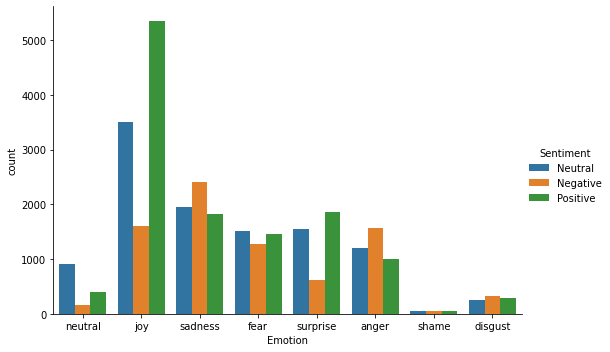

In [33]:
# Lets plot this information
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', aspect=1.5)
plt.show()

We can observe following observations from above plot - 
+ Neutral emotions has lots of neutral sentiment
+ Joy has majority of positive sentiments
+ Sadness has majority of negative sentiments
+ Fear is somewhat mix of all three sentiments depicting different intentions
+ Surprise has majority of positve sentiments depicting that surprises have been there is good manner.
+ Anger as we all know has majority of negative sentiments
+ Shame and Disgust depicting mixed sentiments

In [34]:
#Text cleaning before keyword extraction using neattext
import neattext.functions as nfx

In [35]:
df2 = df.copy()

In [36]:
df2.head()

Emotion                                               Text Sentiment
0  neutral                                             Why ?    Neutral
1      joy    Sage Act upgrade on my to do list for tommorow.   Neutral
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative
3      joy   Such an eye ! The true hazel eye-and so brill...  Positive
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral

In [37]:
df2.shape

(31161, 3)

In [38]:
df2['Clean_Text'] = df2['Text'].apply(nfx.remove_stopwords)

In [40]:
df2['Clean_Text'] = df2['Clean_Text'].apply(nfx.remove_userhandles)

In [41]:
df2['Clean_Text'] = df2['Clean_Text'].apply(nfx.remove_punctuations)

In [42]:
df2[['Text', 'Clean_Text']]

Text  \
0                                                 Why ?    
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
34787  @MichelGW have you gift! Hope you like it! It'...   
34788  The world didnt give it to me..so the world MO...   
34789                           A man robbed me today .    
34790  Youu call it JEALOUSY, I call it of #Losing YO...   
34791  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                         
1                         Sage Act upgrade list tommorow  
2      WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3      eye  true hazel eyeand brilliant  Regular feat...  
4        ugh babe hugggzzz u  babe naamazed nga ako e...  
...                                                  ...  
34787         gift Hope like it hand wear  Itll warm Lol  
34788         world didnt meso world DEFINITELY cnt away  
34789                                  man robbed today   
34790                          Youu JEALOUSY #Losing YOU  
34791                              think baby dream time  

[31161 rows x 2 columns]

#### Keyword Extraction

Here we are going to extract most common words per class of Emotion

In [43]:
from collections import Counter

In [51]:
def extract_keywords(text, number):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(number)
    return dict(most_common_tokens)

In [45]:
#list of Emotions
emotion_list = df['Emotion'].unique().tolist()
print(emotion_list)

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']


In [47]:
#taking clean_text for particular emotion and converting it to list
joy_list = df2[df2['Emotion'] == 'joy']['Clean_Text'].tolist()

In [65]:
sadness_list = df2[df2['Emotion'] == 'sadness']['Clean_Text'].tolist()

In [66]:
fear_list = df2[df2['Emotion'] == 'fear']['Clean_Text'].tolist()

In [67]:
surprise_list = df2[df2['Emotion'] == 'surprise']['Clean_Text'].tolist()

In [68]:
anger_list = df2[df2['Emotion'] == 'anger']['Clean_Text'].tolist()

In [69]:
neutral_list = df2[df2['Emotion'] == 'neutral']['Clean_Text'].tolist()

In [70]:
disgust_list = df2[df2['Emotion'] == 'disgust']['Clean_Text'].tolist()

In [71]:
shame_list = df2[df2['Emotion'] == 'shame']['Clean_Text'].tolist()

In [49]:
# Here we are creating a one single document for each emotion which contains all the sentences of particular emotion in a
# paragraph like structure like corpus.
# We are doing this to get our most common keywords and generate word clouds to plot them out
joy_docx = ''.join(joy_list)

In [72]:
sadness_docx = ''.join(sadness_list)
fear_docx = ''.join(fear_list)
surprise_docx = ''.join(surprise_list)
anger_docx = ''.join(anger_list)
neutral_docx = ''.join(neutral_list)
disgust_docx = ''.join(disgust_list)
shame_docx = ''.join(shame_list)

In [50]:
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness   ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrenchGoodLet  fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileterribly ecstatic dangerous thing selected study universityYeah  ’ ages  passed BA exams class resultsheard selected fot year university Zambia form Chikola secondary schoolWelp time study daysHeading campus rain grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravyClass jamming paper quarter reason celebrate though Studying begin right aftercant wait sleep tomor

In [73]:
fear_docx

'Im expecting extremely important phonecall minute #terror #opportunityassault laughter stand ~ Mark Twain #emotionalcourageprimitive #Instinct thats friendIt warns pay attention ur dangerit tells act saveriding friend car speed 120 km/h snowcovered motorway liked outfriend misunderstood know #heartoflife good     #xA#xAAdd things symptom called #NERVOSO #xA#xAu wanna learn [:bank secret dismay Virgin s venture airlines years ago father ill stayed hospital long time experienced terrible feeling lose himquotThe family bedrock society protect institution marriage country fallquotdismay way kids savaging flora Stonethwaite good example “  shakiest 14point lead history college football” lolPeople trapped elevator actually stairs time let wear  #quote #lifeheard father found letter boyfriend calling talk itresults seeing walk situation w/o LORD FAITH realizing gets b4 doshot horrified look applicable myselfyears ago saw film TV makes afraidSeeing stray dog run right pass Morehouse campus12 

In [74]:
surprise_docx

'maken Tip 2: Stop op een moment dat je het hele project wel ziet zitten Nu dus #derestkomtlaterwelEn dan krijg je ff een cadeautje van een tweep #melike  Drummer Boy bij op verzoek van      : welke uitvoering van wieHaha course come home different house leave parents redo entire downstairs warning  reeeeeellllyyyyyyy need tell something guess what phone fucked up #gotohellmexicanphoneending pooped pants end weeks crazy ending #dEcodEdpop amp roll floor alleen nog morgen cadootjes kopen stadje en dan helemaal klaarIm planet Im planets hold life amp discoveredGood Morning Store Today #EnjoyTheDayforgot hair red looked mirrorStopped today gas small town attendant came tell quotwe #service young #tweeters clueCant wait   open christmas prezzie #christmasDecorating entire house christmas cheer mommyIemand nog surprise idee voor een vrouwtrouble comes realise gone watching reruns living one #oh  thought Id stop SPEND CHRISTMAS HOLIDAYS LAKE Miss youchocomousse vergt 175 ml slagroom dat heb 

In [75]:
anger_docx

'bull tossed effigy hands infuriated   everybody  talk kill work number slakers wandering around nothingparents allow social function friends attendingtried rape best friends claimed fault hassled her claimed loose threatened sue hereffect smoking reeferjuvenile emotion simple minded creature expressSuppressing annoyance called  Little Sara   replied Sly left feeling absolutely livid left student newspaper Chinese university table library disappeared came backdipped cotton wool water dabbed livid puffy eyes soud like neighbours hell teachers suspicious popularity  annoyed lack interest academic work infuriated achieve high marks examinations broke artistic work weeks Changes broken permission right thisimpossible  cheated disappointed actually consider Taylor Swift role Eponine movie version Les Misinformed flatmate that wed moved flat shed expected buy food separetely  event actually happened 5 months sharing began Prior this said nothingimpression arouse anger see angry respects ~Ric

In [76]:
neutral_docx

'motherinlaw thing  disciplining  disciplining  complained food fed  schools sent  sun  think  started talking  found extremely funny witty  stop laughing jokes  common  like team  music  amazingly  love Chinese food  feeling going great friends better prepare examination beachschool Yes  good informative  think people underestimate value TV education ’  ’ look good irritable  understand program  thats ’ damage OK guy want improve handwriting  Ive practiced weeks  happened   handwriting bad Certainly OK  Bye bet company decided cancel trip Hong Kong wish store close open 24  house day enjoy making movie  heard stories disagreement actors director ’ sure  ask directions coffee shop like return book 42 ’ plot new movie Oh  yesshoot pool Yes   magazine arrives post beginning month  buy magazines Bye Yes  going university courses Oh  Im sounds good  Lets ’ sorry  ’ know crossing road pay attention whats Hi  Walter  find table Ill drinks Possibly Brunos Jack wonders Linda likes ’ definitely

In [77]:
disgust_docx

'  Im sorry blanket comfortable you kid #hehasfeelingstoo eats scabslinked poor performance exodus West 330000 East Germans disgruntled Communism ewww got nasty ass default like cuteunderstand mood disgruntled entitled EGM quotwas period poop definitely smelled like period poopquot #ihatemyfamilysmh im sad basketball look forward march madnessHoly shit weighed time college 13 pounds semester Puresickened learn Government acquiesced EC leaders issue Edinburgh Summit  sake subsidiarity  directive dropped gag wenever hear parents quotsexciquot =/anymore care wiley body hair shit placeNewsnight making SICK hearing rioters justifying actions  ew hate chapel hill mallFacebook meI hate u u judged ppl r suppose ur quotFriendsquot thats stick Twitterlistened radio long 5 mins it know againwssu looking sorry ass excuse volleyball game LOL smh undo revulsion tonight s business Ugh  illiteracy rate Memphis  treadmill stress testeating beef chicken involving sort meat  significant revulsion general

In [78]:
shame_docx

'doubted  failed recognise temporary financial embarrassment  s  playing infant games   demanded  gratified flush embarrassment Tristram s cheek remember extremely ashamed racist chants Leeds fans coming night Jasper reddened pressed lip  Farraline looked embarrassed getting increasingly embarrassed Mattie sat waiting ONeill mortified  nt appear presentation ceremony nt receive medal memento occasion men  women  embarrassed noises dissent Americans ashamed kind attitude ashamed feeling sorry transfer pity irresistible hesitated  embarrassed taken long gazed embarrassed young farm worker enjoys leg pulled taunts  yokel   country bumpkin pubs discothques eventually ashamed admitting occupation old people little embarrassment bodily functions  husbands wives stuff takenforgranted childhood decided drop note Carla s letterbox cope embarrassment phone m ashamed suspected  nt home business associates dinner embarrassed  sense  course  including biblical   added penetrating whisper clearly au

In [79]:
# Extracting top 50 Keywords for each emotion
keyword_joy = extract_keywords(joy_docx, number=50)
keyword_sadness = extract_keywords(sadness_docx, number=50)
keyword_fear = extract_keywords(fear_docx, number=50)
keyword_surprise = extract_keywords(surprise_docx, number=50)
keyword_anger = extract_keywords(anger_docx, number=50)
keyword_neutral = extract_keywords(neutral_docx, number=50)
keyword_disgust = extract_keywords(disgust_docx, number=50)
keyword_shame = extract_keywords(shame_docx, number=50)

In [53]:
keyword_joy

{'amp': 634,
 'day': 572,
 'time': 450,
 'Im': 445,
 'like': 420,
 'work': 391,
 'Christmas': 365,
 'today': 317,
 'good': 304,
 'tomorrow': 302,
 'love': 279,
 'going': 276,
 'happy': 257,
 'night': 245,
 'got': 240,
 'home': 237,
 '2': 230,
 'school': 228,
 'morning': 219,
 'joy': 209,
 'life': 201,
 'hours': 198,
 'year': 179,
 'feel': 179,
 'people': 176,
 'long': 175,
 'days': 163,
 'new': 159,
 'sleep': 158,
 'great': 158,
 'week': 157,
 'family': 155,
 'RT': 153,
 'know': 151,
 'hour': 147,
 ':)': 143,
 'God': 140,
 'cant': 137,
 'tonight': 132,
 'friends': 125,
 'right': 123,
 '3': 123,
 'friend': 123,
 'me': 121,
 'old': 120,
 'de': 118,
 '4': 117,
 'u': 114,
 'feeling': 114,
 'start': 114}

In [58]:
#function for plot of most common words
def plot_most_common(mydict, emotion_name):
    df_01 = pd.DataFrame(mydict.items(), columns=['token', 'count']) #converting the dict to dataframe
    plt.figure(figsize=(20,10))
    plt.title("Plot of most common keywords for {}".format(emotion_name))
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

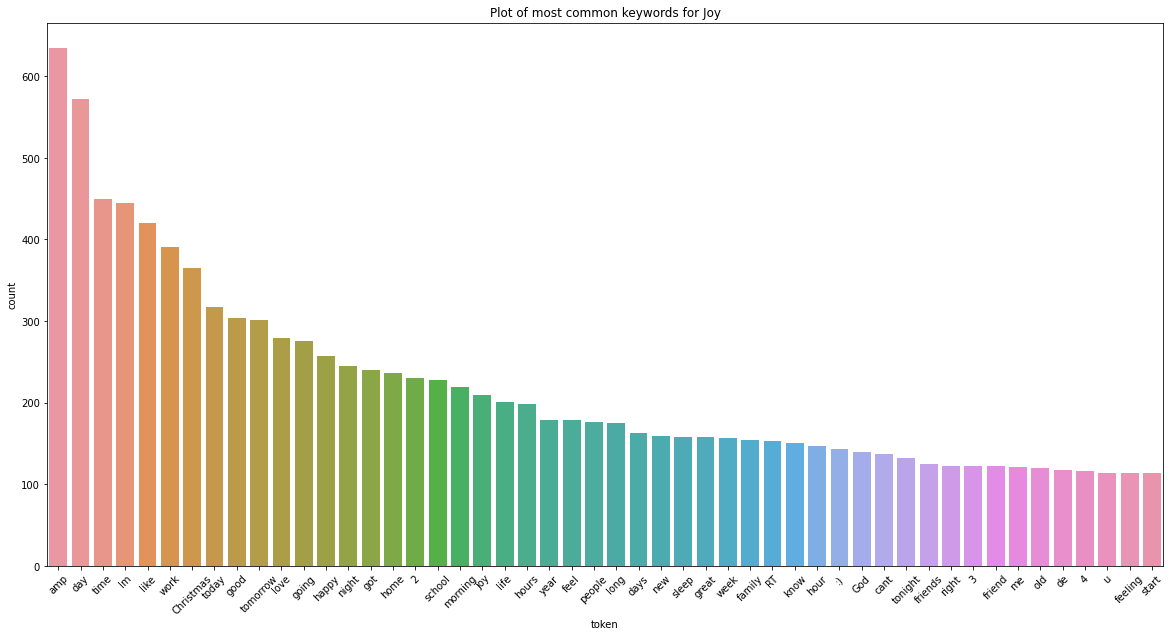

In [59]:
plot_most_common(keyword_joy, "Joy")

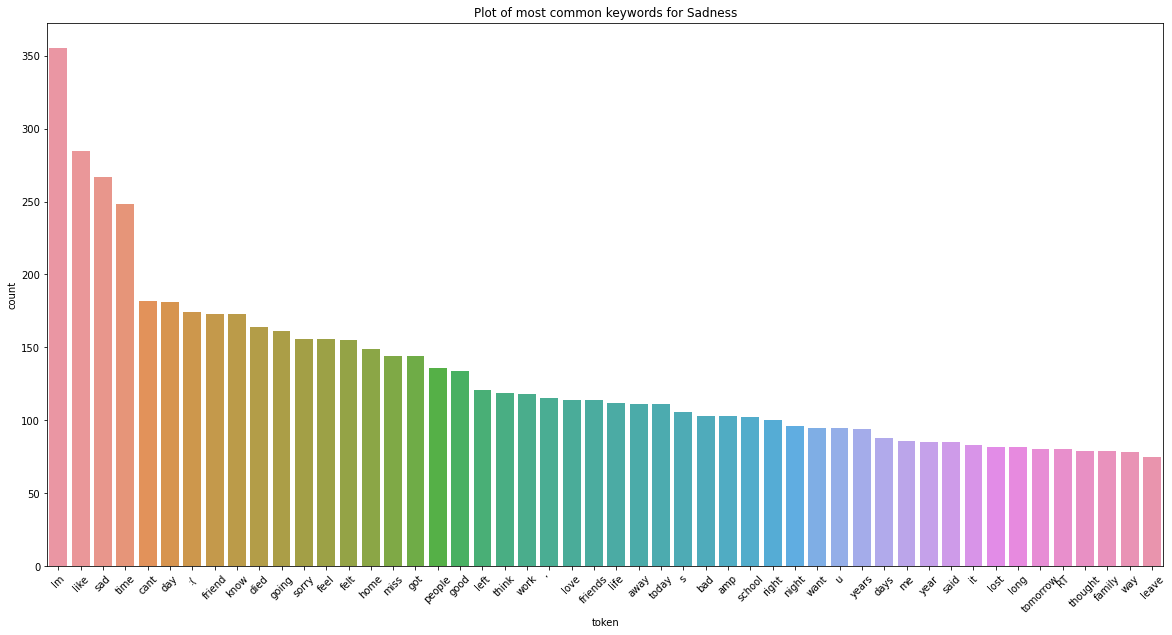

In [80]:
plot_most_common(keyword_sadness, "Sadness")

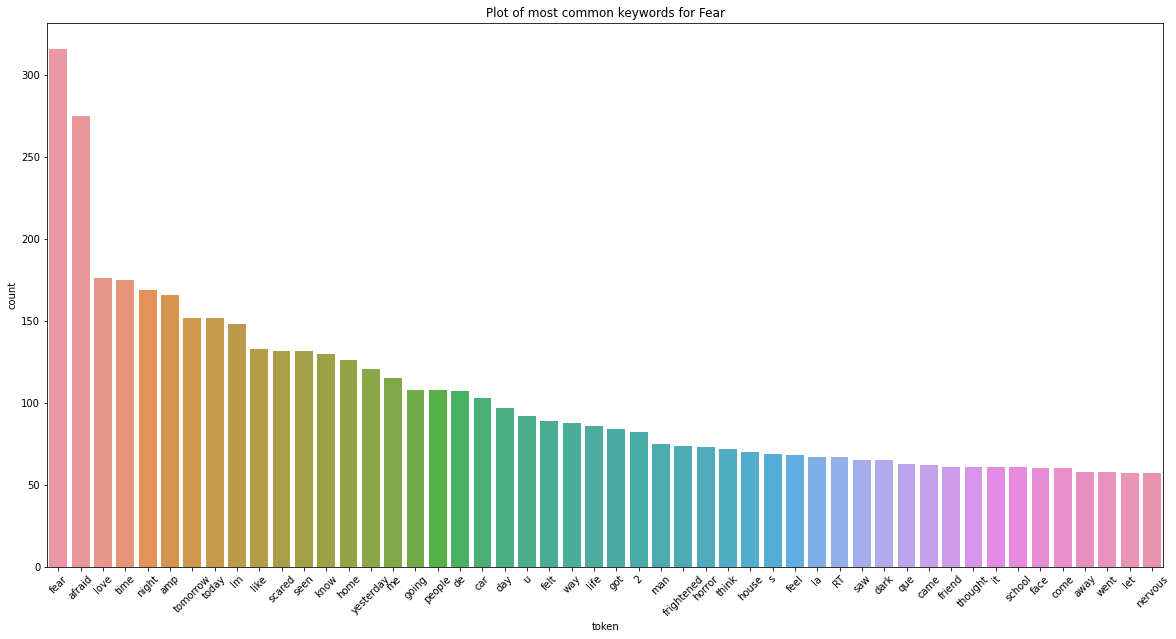

In [81]:
plot_most_common(keyword_fear, "Fear")

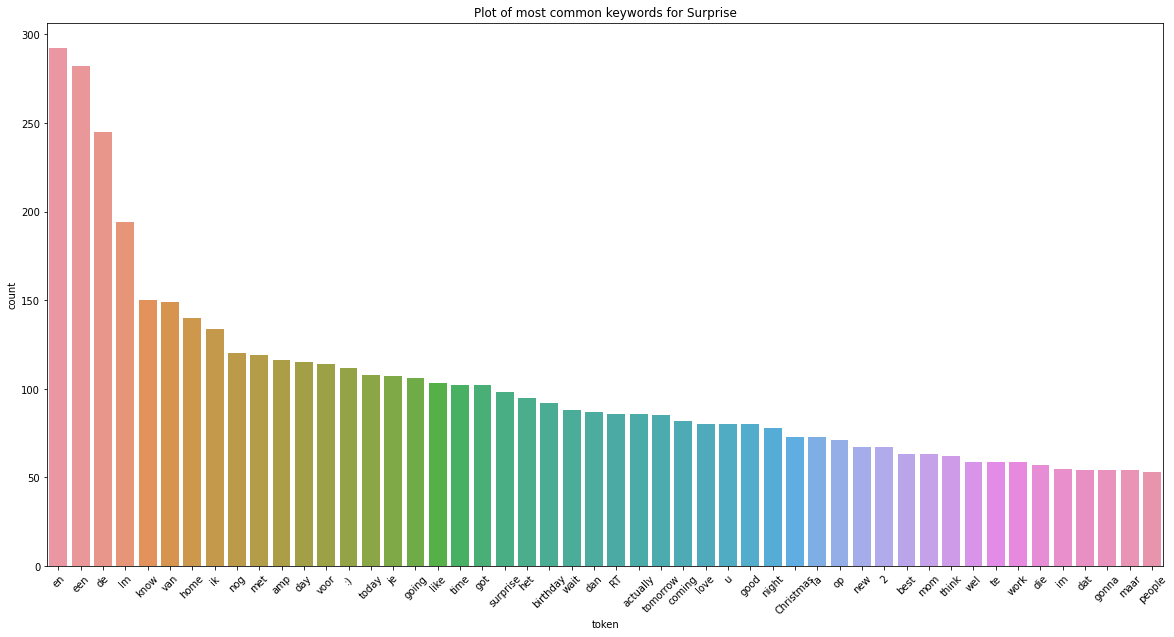

In [82]:
plot_most_common(keyword_surprise, "Surprise")

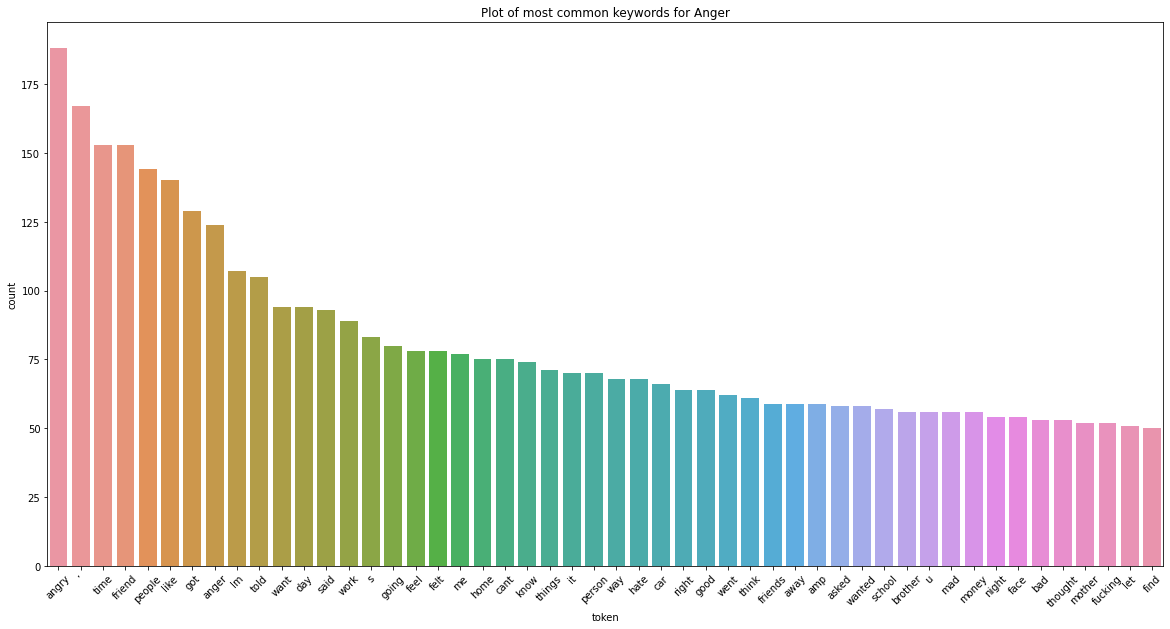

In [83]:
plot_most_common(keyword_anger, "Anger")

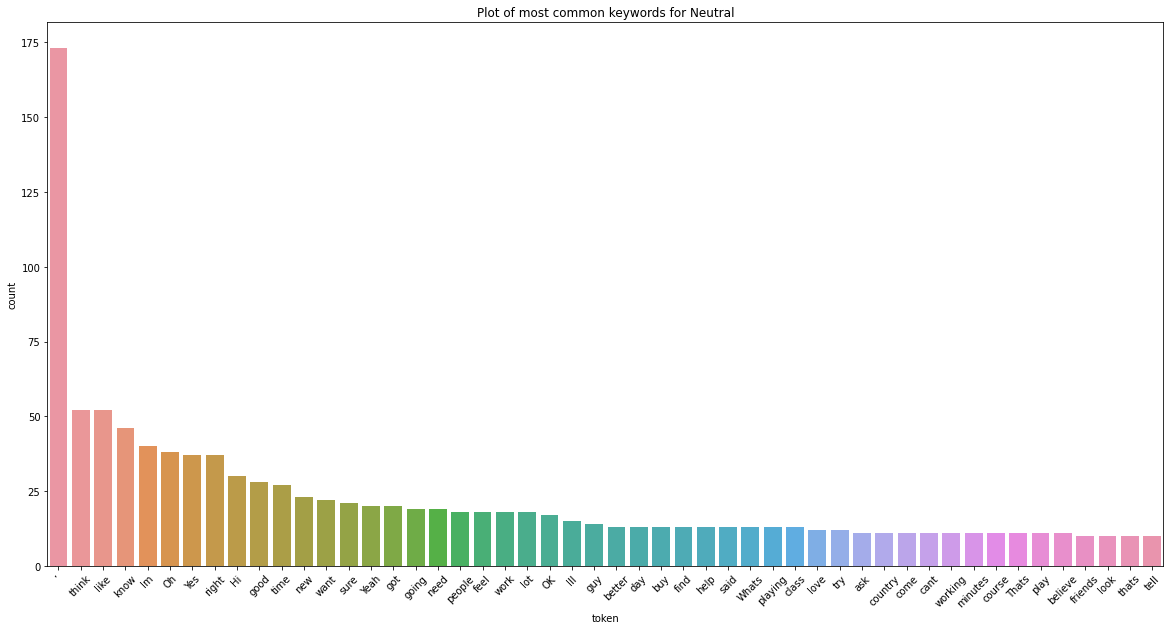

In [84]:
plot_most_common(keyword_neutral, "Neutral")

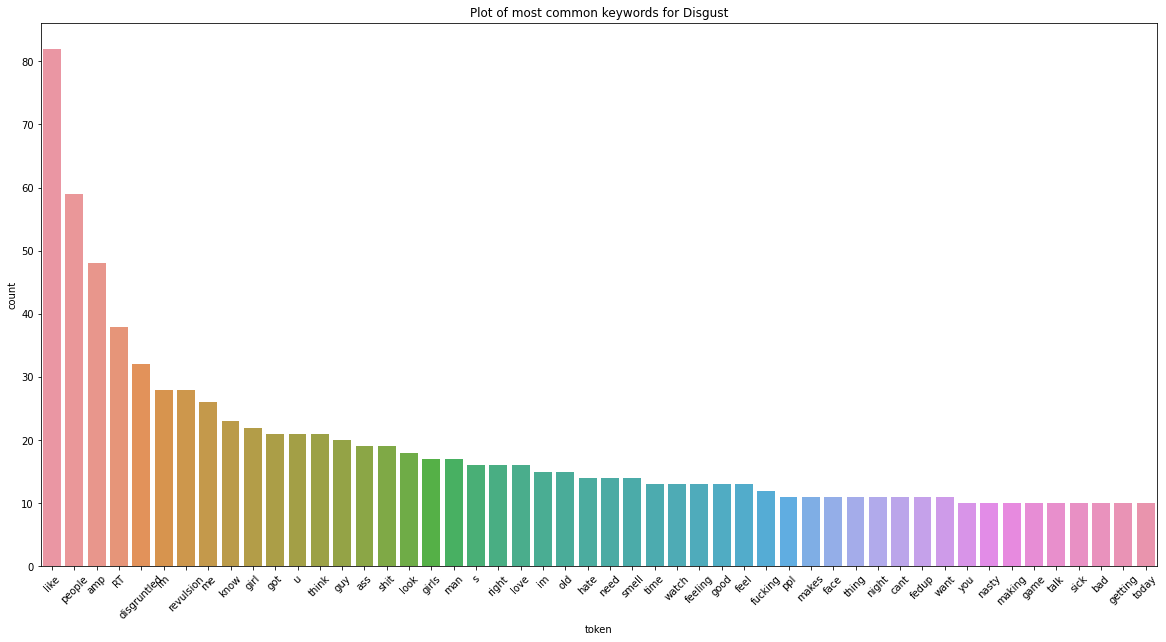

In [85]:
plot_most_common(keyword_disgust, "Disgust")

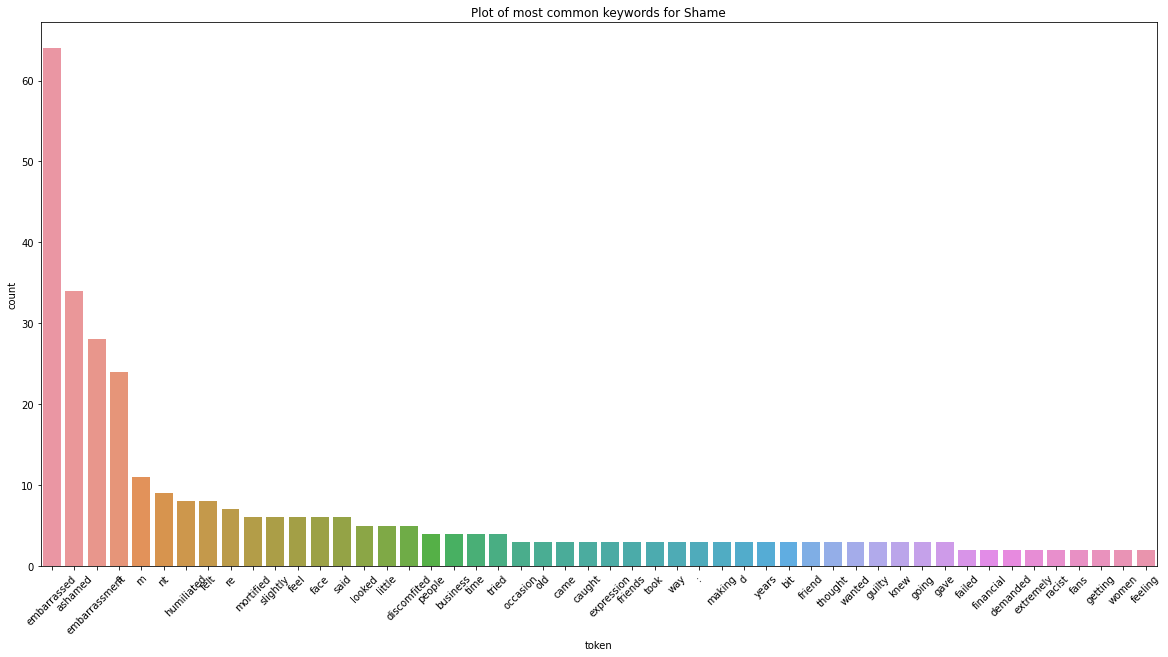

In [86]:
plot_most_common(keyword_shame, "Shame")

### Word Clouds

In [62]:
# Word Cloud 
from wordcloud import WordCloud

In [63]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

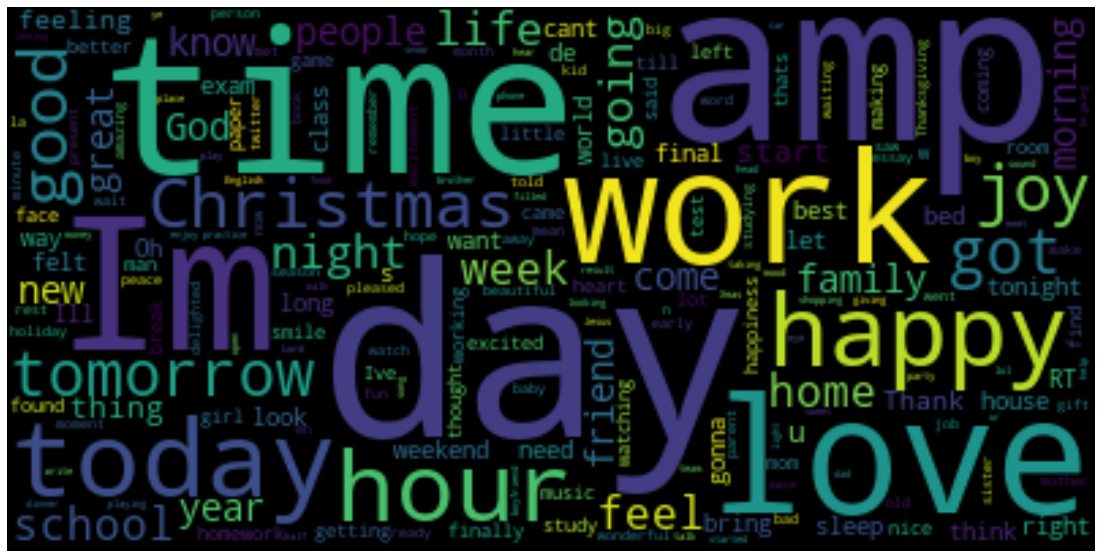

In [64]:
plot_wordcloud(joy_docx)

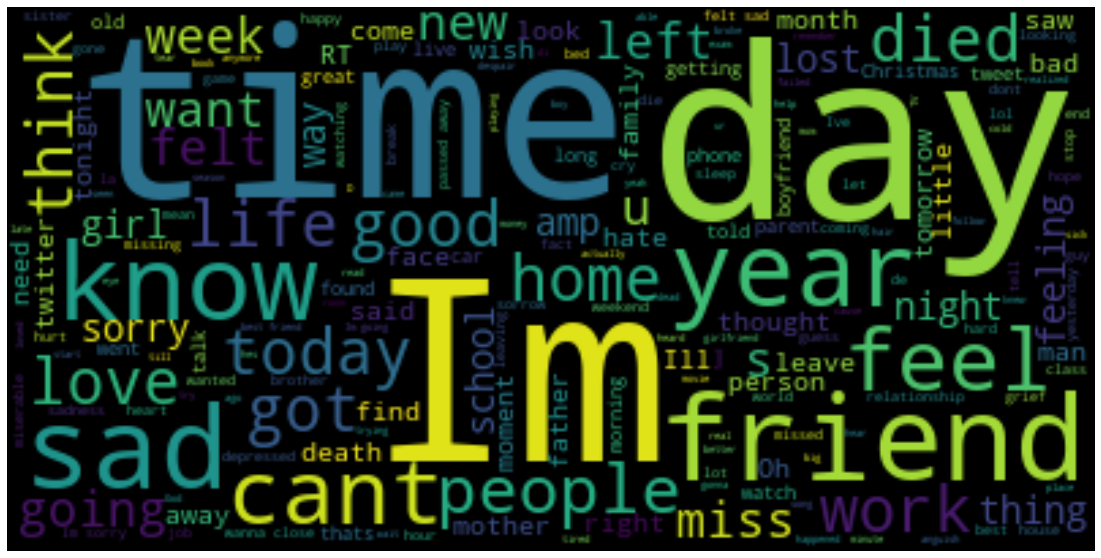

In [87]:
plot_wordcloud(sadness_docx)

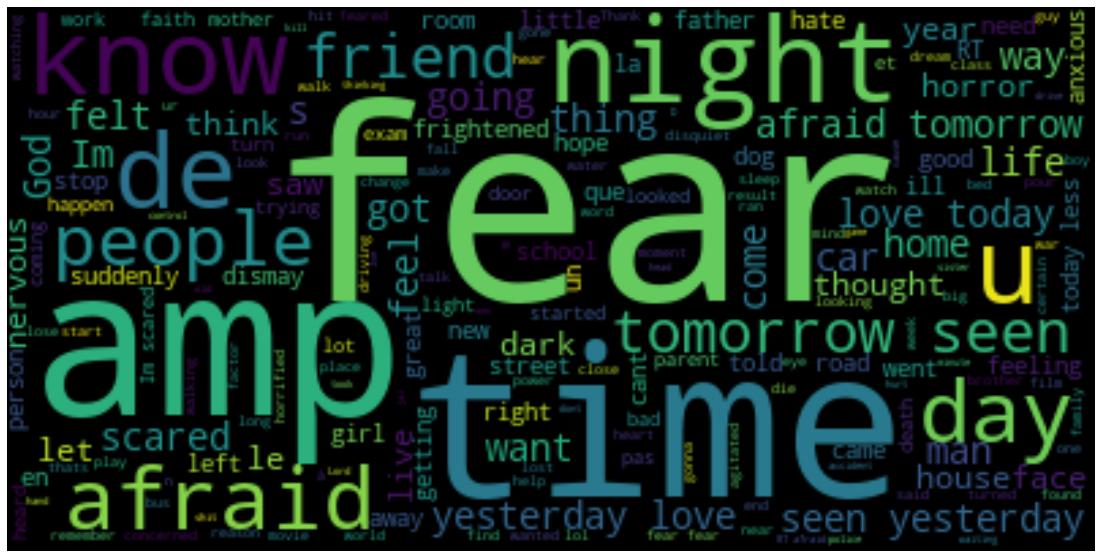

In [88]:
plot_wordcloud(fear_docx)

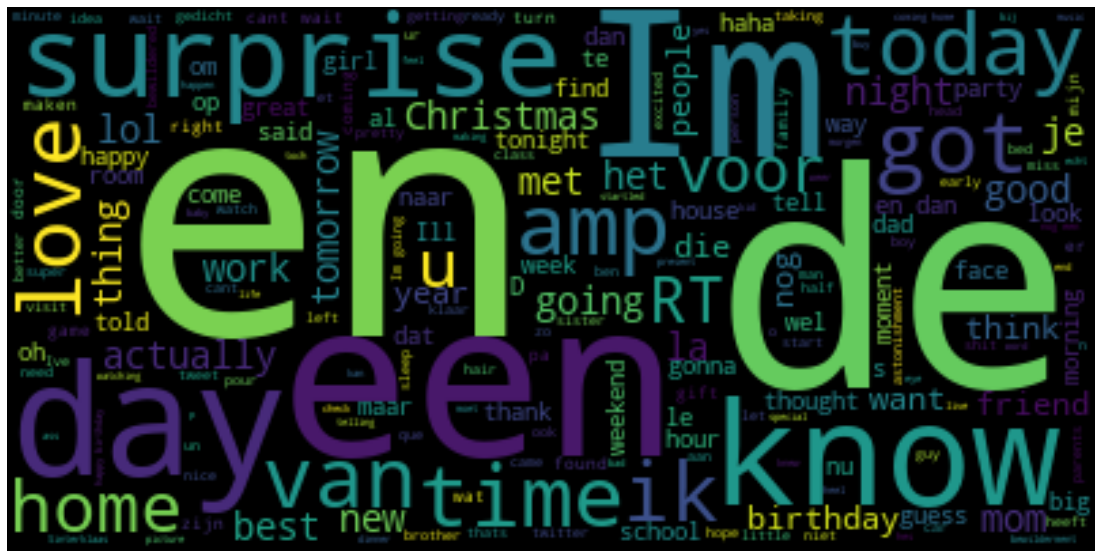

In [89]:
plot_wordcloud(surprise_docx)

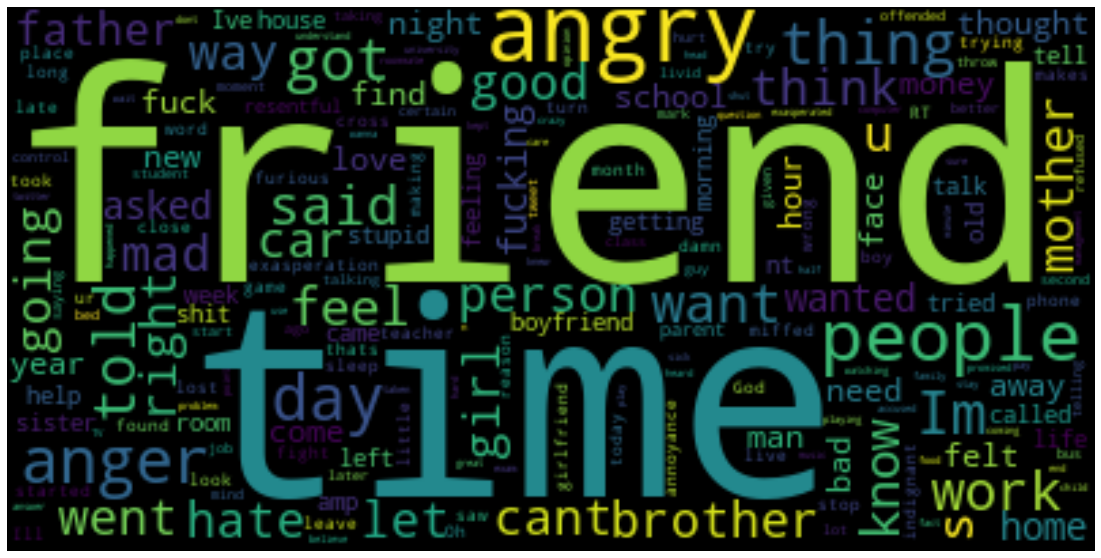

In [90]:
plot_wordcloud(anger_docx)

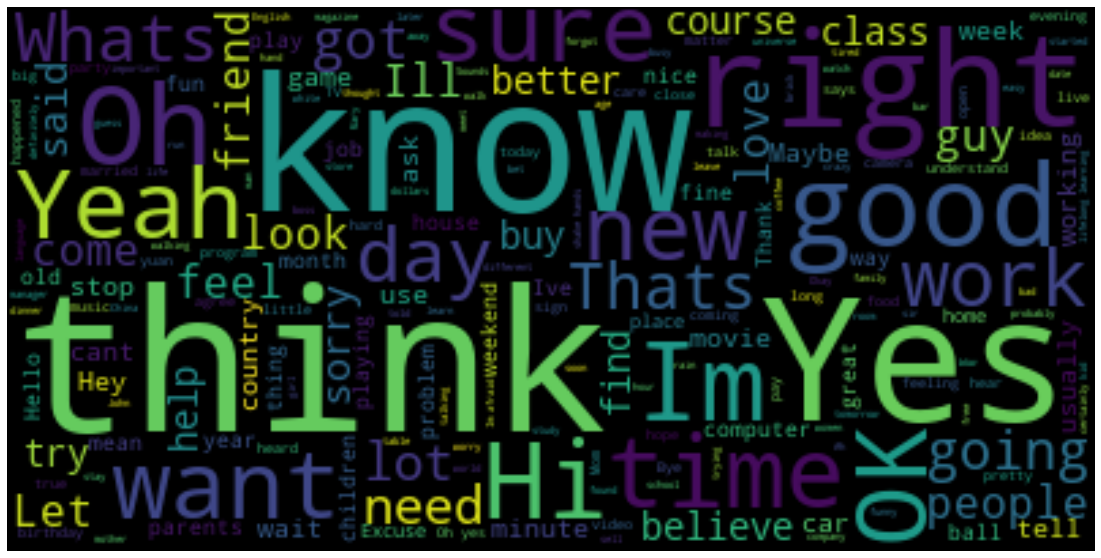

In [91]:
plot_wordcloud(neutral_docx)

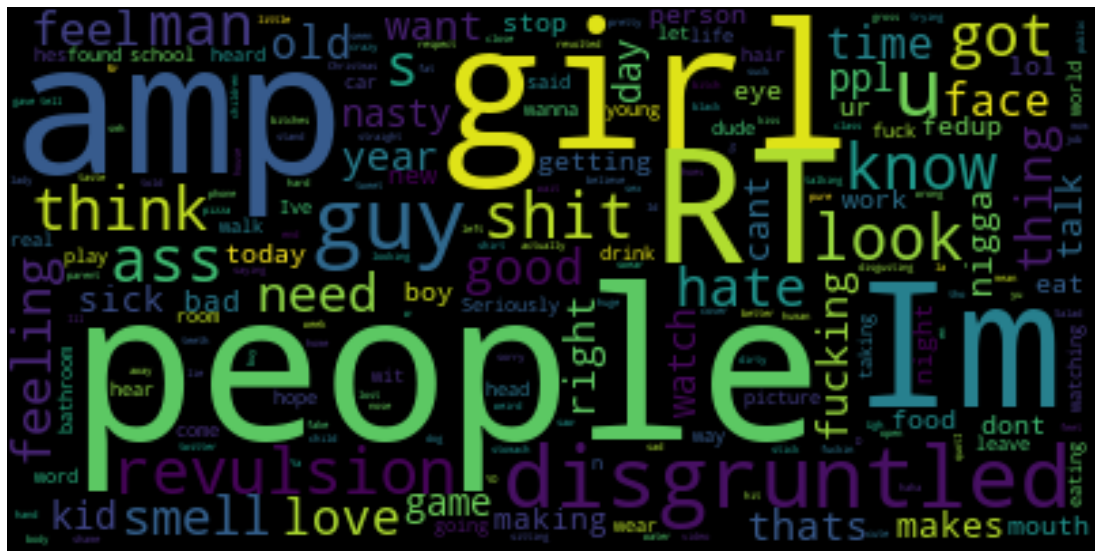

In [92]:
plot_wordcloud(disgust_docx)

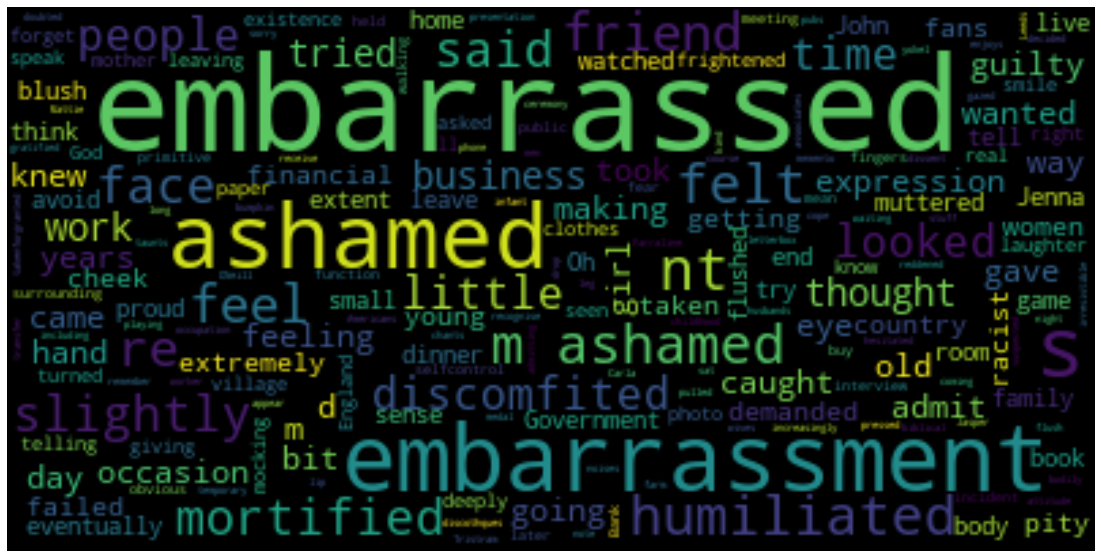

In [93]:
plot_wordcloud(shame_docx)